In [18]:
# # PyCaret using for Machine Learning
# !pip install pycaret

In [20]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from pycaret.classification import *

import string
import warnings
warnings.filterwarnings('ignore')

In [21]:
df_train = pd.read_csv('data/lending_club_loan_two.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [22]:
drop_list = ["grade", "emp_title", "title", "address", 'issue_d', "emp_length"]
df_train.drop(drop_list, axis=1, inplace=True)
df_train = df_train[["loan_status", "annual_inc", "installment", "int_rate", "revol_bal", "revol_util", "dti", "sub_grade", "earliest_cr_line"]]

In [25]:
s = setup(data = df_train,
          target = "loan_status",
          train_size = 0.8,
          normalize = True,
          numeric_imputation = 'median',
          categorical_imputation = 'mode',
          remove_multicollinearity = True,
          fix_imbalance = True,
          fix_imbalance_method = "randomundersampler",
          remove_outliers = True,
          max_encoding_ohe = 25
          )

,Description,Value
0,Session id,3619
1,Target,loan_status
2,Target type,Binary
3,Target mapping,"Charged Off: 0, Fully Paid: 1"
4,Original data shape,"(396030, 9)"
5,Transformed data shape,"(194890, 9)"
6,Transformed train set shape,"(115684, 9)"
7,Transformed test set shape,"(79206, 9)"
8,Numeric features,6
9,Categorical features,2


In [26]:
## รันให้เห็น โมเดลที่ดีที่สุด
best_model = compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6496,0.0000,0.6496,0.7695,0.6844,0.2086,0.2368,5.4110
knn,K Neighbors Classifier,0.5945,0.0000,0.5945,0.7450,0.6361,0.1357,0.1611,9.2770
nb,Naive Bayes,0.6408,0.0000,0.6408,0.7667,0.6768,0.1983,0.2271,4.3550
dt,Decision Tree Classifier,0.5596,0.0000,0.5596,0.7219,0.6049,0.0807,0.0976,5.0640
svm,SVM - Linear Kernel,0.6588,0.0000,0.6588,0.7672,0.6915,0.2099,0.2343,4.4900
ridge,Ridge Classifier,0.6510,0.0000,0.6510,0.7693,0.6855,0.2092,0.2369,4.3520
rf,Random Forest Classifier,0.6229,0.0000,0.6229,0.7683,0.6615,0.1903,0.2246,19.5090
qda,Quadratic Discriminant Analysis,0.6428,0.0000,0.6428,0.7675,0.6785,0.2010,0.2298,4.0880
ada,Ada Boost Classifier,0.6281,0.0000,0.6281,0.7716,0.6661,0.1989,0.2342,7.1760
gbc,Gradient Boosting Classifier,0.6322,0.0000,0.6322,0.7739,0.6698,0.2053,0.2411,15.3490


In [27]:
# models()

In [28]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3619, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [29]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6416,0.0000,0.6416,0.7744,0.6779,0.2121,0.2457
1,0.6417,0.0000,0.6417,0.7747,0.6780,0.2126,0.2464
2,0.6313,0.0000,0.6313,0.7728,0.6690,0.2028,0.2381
3,0.6408,0.0000,0.6408,0.7742,0.6773,0.2112,0.2449
4,0.6371,0.0000,0.6371,0.7748,0.6741,0.2097,0.2448
5,0.6445,0.0000,0.6445,0.7731,0.6803,0.2118,0.2437
6,0.6428,0.0000,0.6428,0.7769,0.6790,0.2170,0.2520
7,0.6430,0.0000,0.6430,0.7769,0.6792,0.2171,0.2520
8,0.6396,0.0000,0.6396,0.7736,0.6761,0.2095,0.2431


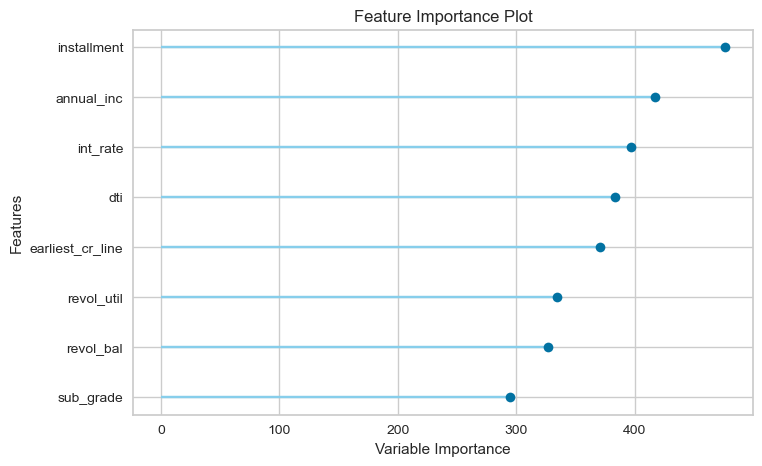

In [30]:
plot_model(lightgbm, plot = 'feature')

In [31]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3619, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [32]:
# turning จูนนิ่ง คือการ set ค่าต่างๆในแต่ละ model auto
tuned_lightgbm = tune_model(lightgbm, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6081,0.0000,0.6081,0.7681,0.6485,0.1813,0.2191
1,0.5966,0.0000,0.5966,0.7702,0.6379,0.1775,0.2194
2,0.5875,0.0000,0.5875,0.7711,0.6295,0.1734,0.2180
3,0.5979,0.0000,0.5979,0.7713,0.6391,0.1799,0.2223
4,0.5965,0.0000,0.5965,0.7686,0.6379,0.1752,0.2159
5,0.5962,0.0000,0.5962,0.7674,0.6376,0.1731,0.2130
6,0.6295,0.0000,0.6295,0.7731,0.6674,0.2021,0.2380
7,0.6067,0.0000,0.6067,0.7736,0.6471,0.1887,0.2307
8,0.6229,0.0000,0.6229,0.7679,0.6615,0.1896,0.2237


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [33]:
tuned_lightgbm.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3619, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)>

In [34]:
print(tuned_lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3619, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [35]:
final = lightgbm

In [36]:
predict_model(final)

,annual_inc,installment,int_rate,revol_bal,revol_util,dti,sub_grade,earliest_cr_line,loan_status,prediction_label,prediction_score
284399,60000.000000,459.049988,18.200001,5095.0,53.099998,33.430000,E1,Aug-2001,Charged Off,Charged Off,0.7992
323512,82000.000000,392.809998,10.990000,11293.0,81.800003,8.650000,B3,Nov-2002,Fully Paid,Fully Paid,0.6752
71832,53800.000000,361.829987,16.990000,18850.0,66.000000,30.940001,D3,Jul-2001,Charged Off,Charged Off,0.7265
391031,75000.000000,858.210022,14.310000,74701.0,62.599998,25.570000,C4,Mar-1999,Fully Paid,Charged Off,0.5618
75160,225000.000000,677.520020,9.990000,83766.0,14.000000,5.550000,B3,Aug-1996,Fully Paid,Fully Paid,0.7345
...,...,...,...,...,...,...,...,...,...,...,...
383625,14400.000000,27.680000,13.610000,289.0,57.799999,24.330000,C2,Sep-2005,Charged Off,Charged Off,0.5391
215922,75000.000000,456.540009,6.030000,23596.0,22.900000,20.900000,A1,Oct-1990,Fully Paid,Fully Paid,0.8634
286596,75000.000000,469.359985,7.900000,11424.0,32.799999,13.660000,A4,Jul-2001,Fully Paid,Fully Paid,0.8045
243225,80000.000000,862.869995,23.990000,31531.0,50.099998,23.320000,F2,May-1999,Fully Paid,Charged Off,0.7594


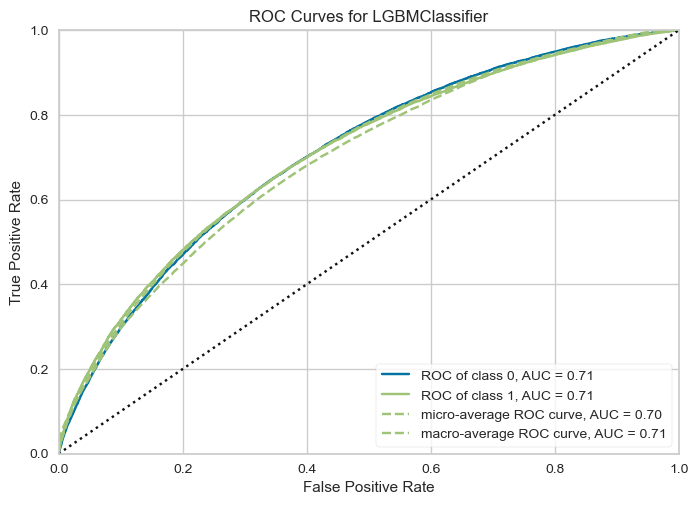

In [37]:
plot_model(final,plot="auc")

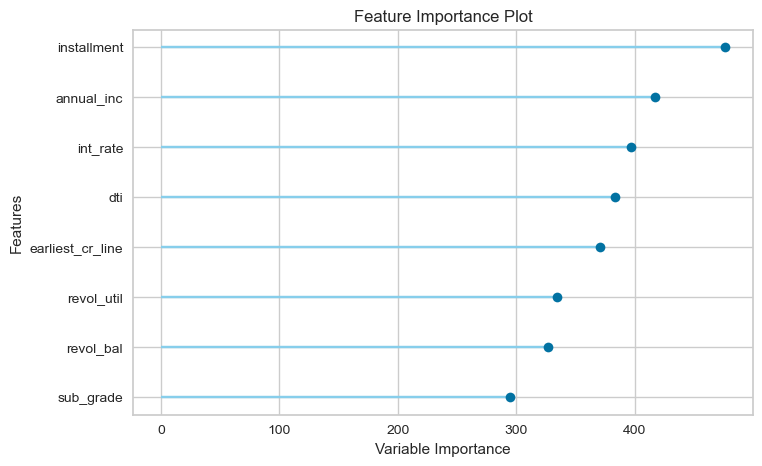

In [38]:
plot_model(final,plot="feature")

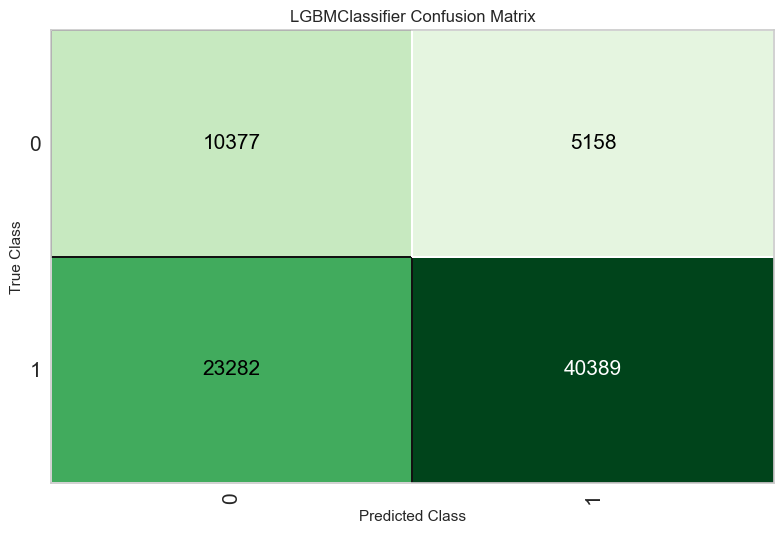

In [39]:
plot_model(final,plot="confusion_matrix")